# Notebook 6 - Clusterización con K-Means



## 1. Implementando K-Means sobre Iris Dataset

---

**Tu tarea:** Implementa una función ***Kmeans($x_1$, $x_2$, $k$, $dist$, $max_iter$)***  que implemente el algoritmo de clusterización K-Means sobre la primera y segunda variable del dataset Iris Setosa (el de las flores ✿). En la celda de abajo se te proporciona una versión inicial del método a implementar, donde las variables de entrada ya son estandarizadas (importante cuando trabajamos con distancias),  y donde se visualizan las posiciones de los centroides inicializados aleatoriamente (en este caso no se utiliza el método Kmeans++, que sería lo óptimo, cosa que puedes hacer como ***bonus***). 

En la función implementada, se repetirán tantas iteraciones de la actualización de la posición de los centroides como indique el parámetro $max_iters$. Implementaciones más avanzadas utilizarían métodos que comprueben si el algoritmo ha convergido para decidir si dejar de iterar. Esto no es necesario en este caso. Visualiza en cada iteración la posición de los clusters y con colores señala a cuál pertenece cada *datapoint.*

Tu misión es la de implementar el resto de la lógica del algoritmo de KMeans. Tu función deberá devolver el vector de centroides actualizado y un vector de tamaño igual al número de registros de tus variables de entrada (**n**), donde se indique el índice del centroide asignado a cada *datapoint.* 

**(Bonus)** Utiliza el *** Método del Codo *** (y visualiza su gráfica) para seleccionar entre un rango diferentes de valores de **K** (por ejemplo, del 1 al 15), el número de clusters óptimos.

In [0]:
import numpy   as np
import scipy   as sc
import sklearn as sk
import pandas  as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing  import scale
from sklearn.datasets       import load_iris
from numpy.random import ranf

# Cargamos los datos
X = load_iris().data

In [0]:
n, p = X.shape

colors = ["blue", "green", "red", "orange", "yellow", "skyblue", "lightgreen", "salmon"]

def Kmeans(x1, x2, k, dist, max_iters=20):
    
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Inicialización aleatoria de los centroides.
  ic    = [np.random.choice(x1.shape[0]) for i in range(k)]
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T

  # Visualiza la posición de los centroides.
  for c in range(k):
    plt.plot(centr[c, 0], centr[c, 1], marker="X", markersize=15, c=colors[c])

  # Visualiza la nube de datos.
  # plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)
  
  centr_iter = [centr.T]
  
  # Mueve los centroides al punto medio
  for steps in range(max_iters + 1):
    
    distances = np.array([dist(centr[i], [x1, x2]) for i in range(k)])

    c_nearest = np.array([ np.argmin(d) for d in distances.T[0]])
      
    x1_ = [x1[c_nearest == i] for i in range(k)]
    x2_ = [x2[c_nearest == i] for i in range(k)]
  
    
    random_pos = lambda x: ranf() * (x.max() - x.min()) + x.min()
  
  
    c1_ = [np.nan_to_num(np.mean(x1_[i]), centr[i,0]) for i in range(k)]
    c2_ = [np.nan_to_num(np.mean(x2_[i]), centr[i,1]) for i in range(k)]
    
    
    centr = np.array([[x, y] for x, y in zip(c1_, c2_)])
    
    centr_iter.append(centr.T)

  
  
    
  centr_iter = np.array(centr_iter).T
   
    
  for c in range(k):
    p1, p2 = x1_[c], x2_[c]
    plt.scatter(p1[p1.nonzero()], p2[p2.nonzero()], color=colors[c], alpha=0.5)
    
  for c in range(k):
    plt.plot(centr[c, 0], centr[c, 1], marker="o", markersize=15, c=colors[c])
    for iteration in centr_iter:
      plt.plot(iteration[0], iteration[1], linewidth=1, c='black', linestyle='--')
  
  
  plt.show()
  return centr, [x1_, x2_]  ## <-- Sustituye esto por el resultado de tu función.

  
# ----------------------- #  

En las gráfica se puede ver como los centroides se mueven intentando separar los puntos en las diferentes clases.

La X es el punto de salida y el circulo la posición final al terminar de iterar. La línea de puntos marca el movimiento del centroide según el algoritmo iteraba.

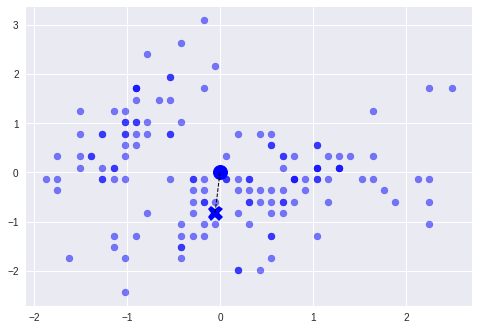

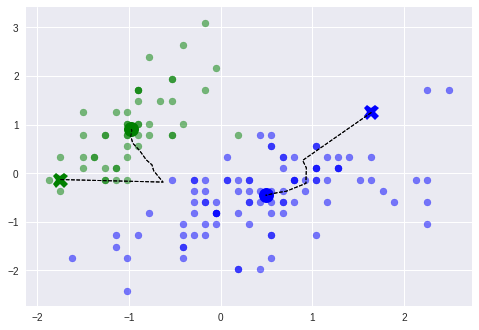

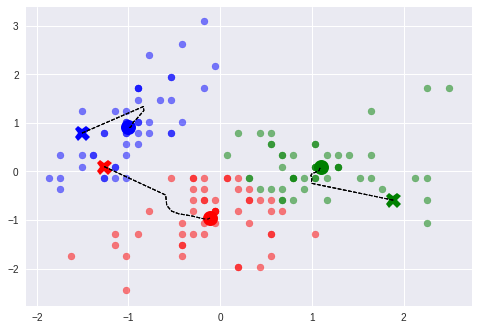

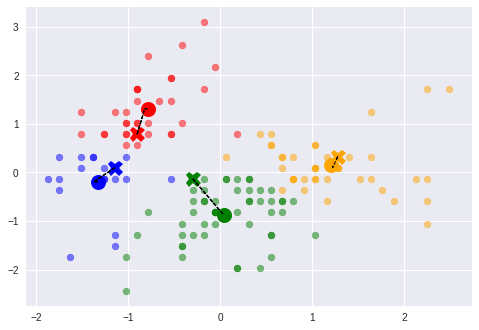

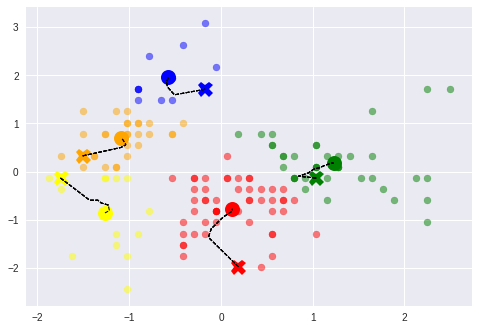

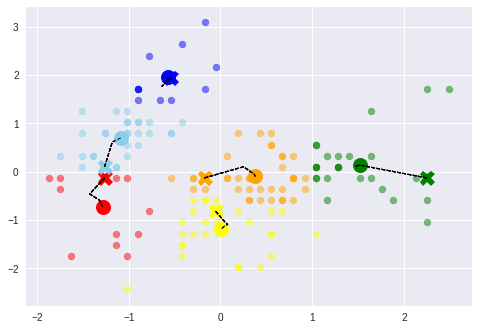

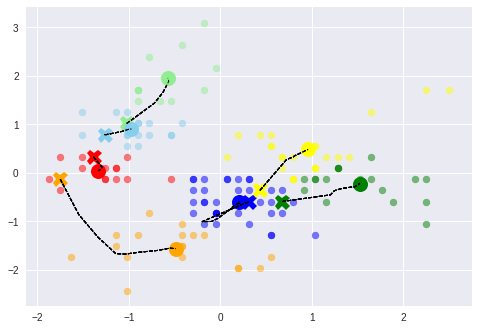

In [3]:

# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Probamos la función:
results = [Kmeans(X[:, 0:1], X[:, 1:2], k, dist, 200) for k in range(1, len(colors))]


El método del codo permite ver cual es la división más acertada, viendo cuando el error var reduciendose cada vez menos según añadimos particiones. En este caso, se puede ver que en 2 y 3 hay una curva, siendo 3 la división real.

--


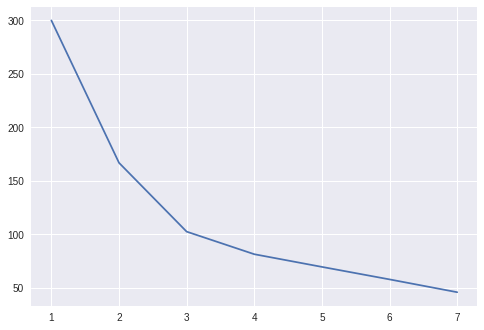

In [4]:
# Ploteamos errores
errors = []
for i, result in enumerate(results):
  centroid = result[0]
  pointsX = result[1][0]
  pointsY = result[1][1]
  
  
  error = 0
  for j in range(i + 1):
    points = [pointsX[j], pointsY[j]]
    error += np.sum(dist(centroid[j], points) ** 2)

  errors.append(error)

plt.plot(np.arange(1, len(colors)), errors)
print("--")